In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE


%matplotlib inline

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd,"DATA/cg.csv")
filepath

'/Users/nalinrajendran/Desktop/STUDY/MIS  SIP PAPER/CHECKPOINTS/CHECK POINT 2/NOTEBOOKS/Chikun Gunya/DATA/cg.csv'

In [3]:
df = pd.read_csv(filepath)
df

,state,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,Kerala,2011,1,7,23.47,72.81,0.04,0.00,13.18,32.30,16.42,24.360,17.61
1,Kerala,2011,2,2,24.90,65.56,1.58,47.46,12.63,33.97,16.10,25.035,16.65
2,Kerala,2011,3,5,27.33,61.00,0.44,10.55,13.37,36.56,18.12,27.340,17.42
3,Kerala,2011,4,13,27.20,72.94,4.01,105.47,16.42,36.91,22.50,29.705,21.04
4,Kerala,2011,5,4,26.72,79.38,4.33,121.29,17.70,34.47,22.46,28.465,22.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kerala,2021,8,35,24.03,90.50,8.42,261.11,17.52,28.51,20.41,24.460,22.26
128,Kerala,2021,9,18,24.33,90.50,7.28,218.52,17.82,29.17,21.54,25.355,22.57
129,Kerala,2021,10,12,24.67,90.38,13.33,413.24,18.19,28.85,22.11,25.480,22.90
130,Kerala,2021,11,10,24.08,90.06,10.07,302.14,17.52,28.38,20.90,24.640,22.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         132 non-null    object 
 1   year          132 non-null    int64  
 2   month         132 non-null    int64  
 3   cases         132 non-null    int64  
 4   mean_temp     132 non-null    float64
 5   relative_hum  132 non-null    float64
 6   prec          132 non-null    float64
 7   prec_sum      132 non-null    float64
 8   humi_spe      132 non-null    float64
 9   temp_max      132 non-null    float64
 10  temp_min      132 non-null    float64
 11  temp_avg      132 non-null    float64
 12  dew_point     132 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 13.5+ KB


In [5]:
df.describe()

,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2016.000000,6.500000,16.348485,25.412121,78.569167,5.213333,154.496136,16.093864,32.165909,20.096591,26.131250,20.631667
std,3.174324,3.465203,20.814699,1.631589,12.025662,4.915950,151.150037,2.167127,3.613296,2.139324,2.158619,2.474223
min,2011.000000,1.000000,0.000000,23.300000,52.000000,0.000000,0.000000,10.800000,26.720000,14.700000,22.620000,13.730000
25%,2013.000000,3.750000,3.000000,24.205000,66.892500,1.030000,26.370000,14.437500,29.120000,18.202500,24.625000,18.960000
50%,2016.000000,6.500000,7.500000,24.700000,82.625000,3.950000,113.380000,17.030000,30.605000,20.640000,25.350000,21.800000
75%,2019.000000,9.250000,22.000000,26.505000,89.297500,8.315000,250.390000,17.820000,35.555000,21.557500,27.592500,22.532500
max,2021.000000,12.000000,105.000000,29.550000,92.500000,21.370000,638.090000,18.800000,39.170000,24.310000,31.430000,23.400000


<AxesSubplot:xlabel='year'>

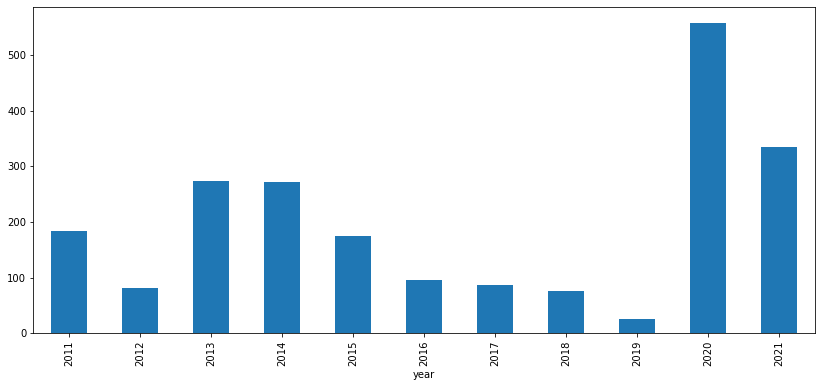

In [6]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].sum().plot.bar()

Text(0.5, 1.0, 'Dengue Cases by Year ')

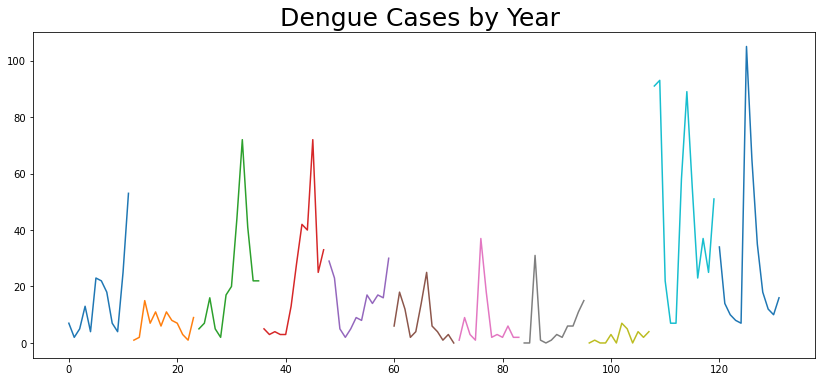

In [7]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].plot()
plt.title('Dengue Cases by Year ', fontsize = 25)

Text(0.5, 1.0, 'Rainfall by Year ')

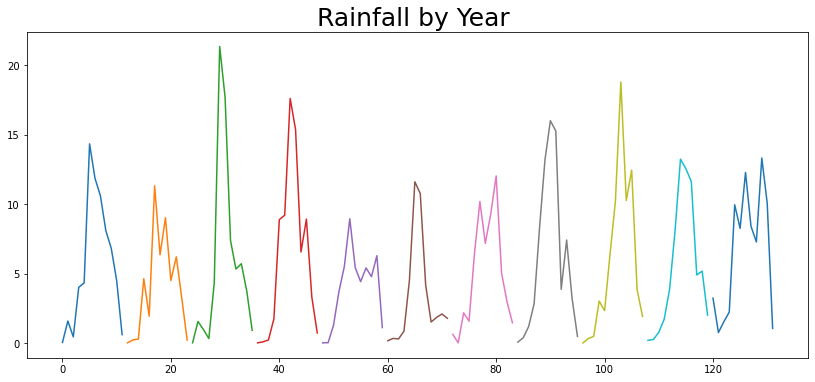

In [8]:
plt.figure(figsize = (14,6))
df.groupby('year')['prec'].plot()
plt.title('Rainfall by Year ', fontsize = 25)

In [9]:
df1 = df.reset_index()['cases']
df1.shape

(132,)

In [10]:
#Scaling the dataset, inorder to make the data for the model to understand easily.

#Using the MinMax scaler, and scaling it between the range of 0 to 1.



scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
np.array(df1)

array([[0.06666667],
       [0.01904762],
       [0.04761905],
       [0.12380952],
       [0.03809524],
       [0.21904762],
       [0.20952381],
       [0.17142857],
       [0.06666667],
       [0.03809524],
       [0.23809524],
       [0.5047619 ],
       [0.00952381],
       [0.01904762],
       [0.14285714],
       [0.06666667],
       [0.1047619 ],
       [0.05714286],
       [0.1047619 ],
       [0.07619048],
       [0.06666667],
       [0.02857143],
       [0.00952381],
       [0.08571429],
       [0.04761905],
       [0.06666667],
       [0.15238095],
       [0.04761905],
       [0.01904762],
       [0.16190476],
       [0.19047619],
       [0.41904762],
       [0.68571429],
       [0.39047619],
       [0.20952381],
       [0.20952381],
       [0.04761905],
       [0.02857143],
       [0.03809524],
       [0.02857143],
       [0.02857143],
       [0.12380952],
       [0.26666667],
       [0.4       ],
       [0.38095238],
       [0.68571429],
       [0.23809524],
       [0.314

In [12]:
df1.shape

(132, 1)

In [13]:
#Splitting the data for Train and Test.

#Taking the 80% of the data for training and 20% for testing.
training_size = int(len(df1)*0.7)
test_size= len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size, test_size

(92, 40)

In [15]:
train_data.shape

(92, 1)

In [16]:
#Using a time series approach. This makes the next value in the dataset dependent upon the preceeding values.

def create_dataset (dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
#Here we are considering the time setp as 2. So, the data on the 3rd month(say for an example),
#will be dependent upon the first two months.

time_step = 2
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_test.shape), print(y_test.shape)

(37, 2)
(37,)


(None, None)

In [19]:
X_test

array([[0.05714286, 0.05714286],
       [0.05714286, 0.1047619 ],
       [0.1047619 , 0.14285714],
       [0.14285714, 0.        ],
       [0.        , 0.00952381],
       [0.00952381, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.02857143],
       [0.02857143, 0.        ],
       [0.        , 0.06666667],
       [0.06666667, 0.04761905],
       [0.04761905, 0.        ],
       [0.        , 0.03809524],
       [0.03809524, 0.01904762],
       [0.01904762, 0.03809524],
       [0.03809524, 0.86666667],
       [0.86666667, 0.88571429],
       [0.88571429, 0.20952381],
       [0.20952381, 0.06666667],
       [0.06666667, 0.06666667],
       [0.06666667, 0.55238095],
       [0.55238095, 0.84761905],
       [0.84761905, 0.52380952],
       [0.52380952, 0.21904762],
       [0.21904762, 0.35238095],
       [0.35238095, 0.23809524],
       [0.23809524, 0.48571429],
       [0.48571429, 0.32380952],
       [0.32380952, 0.13333333],
       [0.13333333, 0.0952381 ],
       [0.

In [20]:
#Adding a third axis(reshaping) to the dataset.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
X_test.shape

(37, 2, 1)

In [22]:
#Desining the neural network, by stacking the wanted layers, since it can automatically do the feature extraction 
#and reduce the number of parameters.

model = Sequential()
model.add(LSTM(11,return_sequences=True, input_shape=(2,1)))
model.add(LSTM(11,return_sequences=True))
model.add(LSTM(11))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = "adam")

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 11)             572       
                                                                 
 lstm_1 (LSTM)               (None, 2, 11)             1012      
                                                                 
 lstm_2 (LSTM)               (None, 11)                1012      
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 2,608
Trainable params: 2,608
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Training the model.

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=38, verbose=1)

Epoch 1/50
3/3 [==============================] - 0s 35ms/step - loss: 0.0138 - val_loss: 0.0708
Epoch 2/50
3/3 [==============================] - 0s 29ms/step - loss: 0.0138 - val_loss: 0.0709
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0138 - val_loss: 0.0711
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0138 - val_loss: 0.0715
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0139 - val_loss: 0.0717
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0139 - val_loss: 0.0718
Epoch 7/50
3/3 [==============================] - 0s 27ms/step - loss: 0.0139 - val_loss: 0.0718
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0139 - val_loss: 0.0712
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0138 - val_loss: 0.0708
Epoch 10/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0139 - val_loss: 0.0706
Epoch 11/50
3/3 [============

In [34]:
#Using the trained model to predict on the train and the test datasets.

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
#Inversing the Scaled values to the original values inorder to calculate the MAE.

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [36]:
math.sqrt(mean_squared_error(y_train, train_predict))

14.828902566620554

In [37]:
math.sqrt(mean_squared_error(y_test,test_predict))

21.660389296820107

In [38]:
y_true, y_pred = y_test, model.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 0.238867


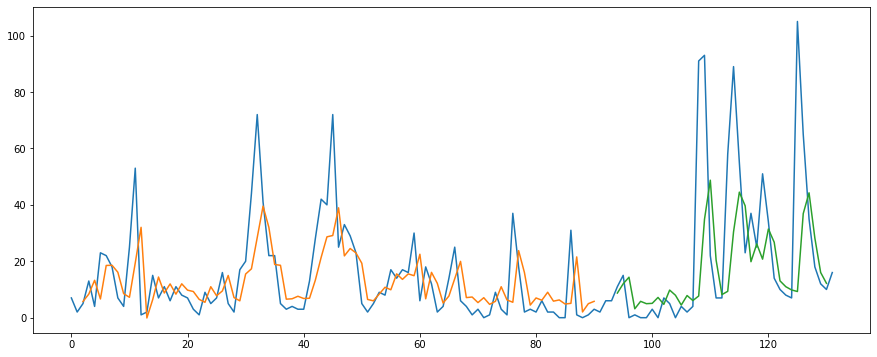

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=2
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


# plot baseline and predictions
plt.figure(figsize = (15,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

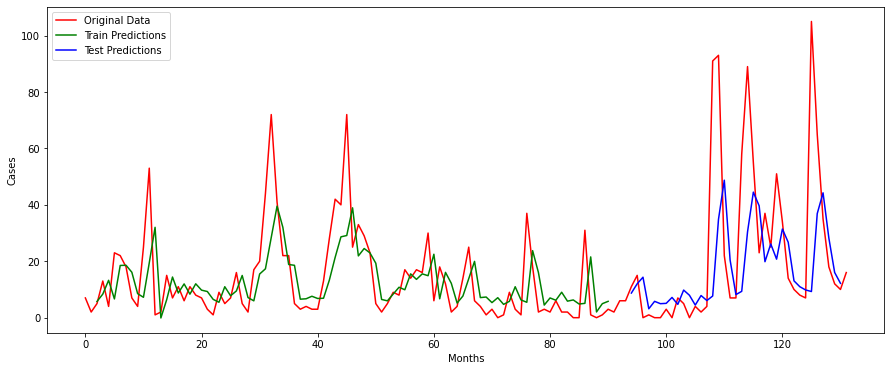

In [40]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1), 'r', label='Original Data')
plt.plot(trainPredictPlot, 'g', label='Train Predictions')
plt.plot(testPredictPlot, 'b', label='Test Predictions')
plt.xlabel('Months')
plt.ylabel('Cases')
plt.legend()
plt.show()
